In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [90]:
df_complaints = pd.read_csv("/content/complaints.csv")
df_doctors = pd.read_csv("/content/doctors.csv")
df_instructions = pd.read_csv("/content/instructions.csv")
df_orders = pd.read_csv("/content/orders.csv")

In [91]:
df_orders

,DoctorID,OrderID,OrderNum,Condition A,Condition B,Condition C,Condition D,Condition F,Condition G,Condition H,Condition I,Condition J
0,ABJEAI,DGEJFDC,AIBEHCJ,False,False,False,False,False,True,True,False,Before
1,HBIEA,DGAJDAH,AIJIHGB,False,True,NaN,False,False,True,False,True,Before
2,GGCCD,DGBBDCB,AFEIHFB,False,False,False,False,False,False,False,False,NaN
3,EHHGF,DGCDCCF,AIBJJEE,False,False,False,True,False,False,True,False,Before
4,EHHGF,DGCFAGC,AEDBBDC,False,False,False,False,False,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
252,FJFEG,DGDBGJH,AIBCDCE,False,True,False,False,False,True,True,False,Before
253,FJFEG,DGDBGGI,AIBCDGD,False,False,True,False,False,False,True,False,Before
254,FJFEG,DGEABGI,AIBFJHE,True,False,False,False,False,False,False,False,Before
255,FJFEG,DGEABGI,AIBFJHE,True,False,False,True,False,False,False,False,Before


In [92]:
df_doctors

,DoctorID,Region,Category,Rank,Incidence rate,R rate,Satisfaction,Experience,Purchases
0,AHDCBA,4 15,Specialist,Ambassador,49.00,0.90,53.85,1.20,49.0
1,ABHAHF,1 8 T4,General Practitioner,Ambassador,37.00,0.00,100.00,0.00,38.0
2,FDHFJ,1 9 T4,Specialist,Ambassador,33.00,1.53,--,0.00,34.0
3,BJJHCA,1 10 T3,Specialist,Ambassador,28.00,2.03,--,0.48,29.0
4,FJBEA,1 14 T4,Specialist,Ambassador,23.00,0.96,76.79,0.75,24.0
...,...,...,...,...,...,...,...,...,...
432,AIABDJ,1 10,Specialist,Ambassador,2.18,0.80,11.76,0.77,35.0
433,BBAJCF,1 9 T4,Specialist,Ambassador,2.17,1.68,--,0.11,19.0
434,GGCFB,1 19 T4,Specialist,Ambassador,2.14,0.77,--,0.27,22.0
435,FDCEG,1 9,Specialist,Ambassador,2.13,0.84,100.00,0.32,25.0


In [93]:
df_doctors.corr()

,Incidence rate,R rate,Experience,Purchases
Incidence rate,1.000000,-0.042222,-0.046574,0.249506
R rate,-0.042222,1.000000,0.103650,-0.001123
Experience,-0.046574,0.103650,1.000000,0.008345
Purchases,0.249506,-0.001123,0.008345,1.000000


In [94]:
for col in ["Category",'Region', 'Rank']:
    df_doctors[col] = df_doctors[col].astype('category')
    df_doctors[col] = df_doctors[col].cat.codes

In [95]:
df_doctors['Satisfaction'] = df_doctors['Satisfaction'].replace("--", 0)
df_doctors["Satisfaction"] = df_doctors["Satisfaction"].astype('float')

In [96]:
data_frames = [ df_complaints,
                df_doctors ,
                df_instructions, 
                df_orders ]

import functools
df_merged = functools.reduce(lambda  left,right: pd.merge(left,right,on=['DoctorID'],
                                            how='outer'), data_frames)

In [97]:
df_merged.isnull().sum()

DoctorID            0
Complaint Type    365
Qty               363
Region            319
Category          319
Rank              319
Incidence rate    319
R rate            319
Satisfaction      319
Experience        319
Purchases         319
Instructions      933
OrderID           671
OrderNum          671
Condition A       671
Condition B       671
Condition C       682
Condition D       671
Condition F       675
Condition G       675
Condition H       671
Condition I       671
Condition J       858
dtype: int64

In [98]:
df_merged

,DoctorID,Complaint Type,Qty,Region,Category,Rank,Incidence rate,R rate,Satisfaction,Experience,...,OrderNum,Condition A,Condition B,Condition C,Condition D,Condition F,Condition G,Condition H,Condition I,Condition J
0,EHAHI,Correct,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EHDGF,Correct,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EHDGF,Unknown,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EHDIJ,Correct,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EHDIJ,Incorrect,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,BABIEG,NaN,NaN,16.0,1.0,3.0,2.25,0.23,-33.33,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1101,HGAFG,NaN,NaN,15.0,1.0,0.0,2.20,0.88,0.00,0.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1102,GGCFB,NaN,NaN,15.0,1.0,0.0,2.14,0.77,0.00,0.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1103,FDCEG,NaN,NaN,22.0,1.0,0.0,2.13,0.84,100.00,0.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
df_merged["Complaint Type"].value_counts()

Correct      355
Incorrect    220
Unknown      152
Specific      11
R&R            2
Name: Complaint Type, dtype: int64

In [100]:
df = df_merged[df_merged['DoctorID'].isin(list(df_doctors["DoctorID"]))]

In [101]:
df['Complaint Type'] = df['Complaint Type'].replace(np.nan,"or")

In [102]:
df['Qty'] = df['Qty'].replace(np.nan,0)

In [103]:
df.drop(['OrderNum',"OrderID"],inplace=True, axis=1)

In [104]:
df

,DoctorID,Complaint Type,Qty,Region,Category,Rank,Incidence rate,R rate,Satisfaction,Experience,...,Instructions,Condition A,Condition B,Condition C,Condition D,Condition F,Condition G,Condition H,Condition I,Condition J
8,EHEGI,Correct,1.0,19.0,1.0,3.0,3.00,1.50,0.00,0.25,...,NaN,False,True,True,True,False,False,False,False,Before
9,EHEGI,Unknown,1.0,19.0,1.0,3.0,3.00,1.50,0.00,0.25,...,NaN,False,True,True,True,False,False,False,False,Before
12,EHHGF,Correct,1.0,4.0,1.0,7.0,2.50,1.86,-100.00,0.57,...,NaN,False,False,False,True,False,False,True,False,Before
13,EHHGF,Correct,1.0,4.0,1.0,7.0,2.50,1.86,-100.00,0.57,...,NaN,False,False,False,False,False,False,False,False,NaN
14,EHHGF,Correct,1.0,4.0,1.0,7.0,2.50,1.86,-100.00,0.57,...,NaN,False,False,False,False,False,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,BABIEG,or,0.0,16.0,1.0,3.0,2.25,0.23,-33.33,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1101,HGAFG,or,0.0,15.0,1.0,0.0,2.20,0.88,0.00,0.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1102,GGCFB,or,0.0,15.0,1.0,0.0,2.14,0.77,0.00,0.27,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1103,FDCEG,or,0.0,22.0,1.0,0.0,2.13,0.84,100.00,0.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df = df.replace(np.nan,"or")

Memnuniyet kolonunu müşterinin belirli oranlarına kategorize ederek yeni bir kolon oluşturabiliriz.

In [108]:
df.loc[(df['Satisfaction'] < -50), 'Satisfaction_Category'] = 'Very_Low'
df.loc[(df['Satisfaction'] > -50) & (df['Satisfaction'] < 0), 'Satisfaction_Category'] = 'Low'
df.loc[(df['Satisfaction'] >   0) & (df['Satisfaction'] <50), 'Satisfaction_Category'] = 'High'
df.loc[(df['Satisfaction'] >  50), 'Satisfaction_Category'] = 'Very_High'

In [38]:
df['Satisfaction_Category'] = df['Satisfaction_Category'].replace(np.nan,"or")

In [39]:
df

,DoctorID,Complaint Type,Qty,Region,Category,Rank,Incidence rate,R rate,Satisfaction,Experience,...,Condition A,Condition B,Condition C,Condition D,Condition F,Condition G,Condition H,Condition I,Condition J,Satisfaction_Category
8,EHEGI,0,1.0,19.0,1.0,3.0,3.00,1.50,0.00,0.25,...,0,1,1,1,0,0,0,0,1,or
9,EHEGI,4,1.0,19.0,1.0,3.0,3.00,1.50,0.00,0.25,...,0,1,1,1,0,0,0,0,1,or
12,EHHGF,0,1.0,4.0,1.0,7.0,2.50,1.86,-100.00,0.57,...,0,0,0,1,0,0,1,0,1,Very_Low
13,EHHGF,0,1.0,4.0,1.0,7.0,2.50,1.86,-100.00,0.57,...,0,0,0,0,0,0,0,0,2,Very_Low
14,EHHGF,0,1.0,4.0,1.0,7.0,2.50,1.86,-100.00,0.57,...,0,0,0,0,0,0,0,0,2,Very_Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,BABIEG,5,0.0,16.0,1.0,3.0,2.25,0.23,-33.33,0.00,...,2,2,2,2,2,2,2,2,2,Low
1101,HGAFG,5,0.0,15.0,1.0,0.0,2.20,0.88,0.00,0.06,...,2,2,2,2,2,2,2,2,2,or
1102,GGCFB,5,0.0,15.0,1.0,0.0,2.14,0.77,0.00,0.27,...,2,2,2,2,2,2,2,2,2,or
1103,FDCEG,5,0.0,22.0,1.0,0.0,2.13,0.84,100.00,0.32,...,2,2,2,2,2,2,2,2,2,Very_High


In [109]:
for col in ["Complaint Type",'Instructions', 'Condition A', 'Condition B', 'Condition C',
       'Condition D', 'Condition F', 'Condition G', 'Condition H',
       'Condition I', 'Condition J','Satisfaction_Category']:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

In [110]:
df["Complaint Type"].value_counts()

5    363
0    200
1    137
4     76
3      8
2      2
Name: Complaint Type, dtype: int64

In [111]:
df["Satisfaction_Category"].value_counts()

-1    421
 2    165
 0    114
 1     52
 3     34
Name: Satisfaction_Category, dtype: int64

In [136]:
df.head()

,DoctorID,Complaint Type,Qty,Region,Category,Rank,Incidence rate,R rate,Satisfaction,Experience,...,Condition B,Condition C,Condition D,Condition F,Condition G,Condition H,Condition I,Condition J,Satisfaction_Category,clusters
8,EHEGI,0,1.0,19.0,1.0,3.0,3.0,1.50,0.0,0.25,...,2,2,2,1,1,1,1,2,-1,1
9,EHEGI,4,1.0,19.0,1.0,3.0,3.0,1.50,0.0,0.25,...,2,2,2,1,1,1,1,2,-1,1
12,EHHGF,0,1.0,4.0,1.0,7.0,2.5,1.86,-100.0,0.57,...,1,1,2,1,1,2,1,2,3,1
13,EHHGF,0,1.0,4.0,1.0,7.0,2.5,1.86,-100.0,0.57,...,1,1,1,1,1,1,1,0,3,1
14,EHHGF,0,1.0,4.0,1.0,7.0,2.5,1.86,-100.0,0.57,...,1,1,1,1,1,1,1,0,3,1


In [135]:
df.iloc[:,1:]

,Complaint Type,Qty,Region,Category,Rank,Incidence rate,R rate,Satisfaction,Experience,Purchases,...,Condition B,Condition C,Condition D,Condition F,Condition G,Condition H,Condition I,Condition J,Satisfaction_Category,clusters
8,0,1.0,19.0,1.0,3.0,3.00,1.50,0.00,0.25,4.0,...,2,2,2,1,1,1,1,2,-1,1
9,4,1.0,19.0,1.0,3.0,3.00,1.50,0.00,0.25,4.0,...,2,2,2,1,1,1,1,2,-1,1
12,0,1.0,4.0,1.0,7.0,2.50,1.86,-100.00,0.57,7.0,...,1,1,2,1,1,2,1,2,3,1
13,0,1.0,4.0,1.0,7.0,2.50,1.86,-100.00,0.57,7.0,...,1,1,1,1,1,1,1,0,3,1
14,0,1.0,4.0,1.0,7.0,2.50,1.86,-100.00,0.57,7.0,...,1,1,1,1,1,1,1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,5,0.0,16.0,1.0,3.0,2.25,0.23,-33.33,0.00,13.0,...,0,0,0,0,0,0,0,0,1,0
1101,5,0.0,15.0,1.0,0.0,2.20,0.88,0.00,0.06,16.0,...,0,0,0,0,0,0,0,0,-1,0
1102,5,0.0,15.0,1.0,0.0,2.14,0.77,0.00,0.27,22.0,...,0,0,0,0,0,0,0,0,-1,0
1103,5,0.0,22.0,1.0,0.0,2.13,0.84,100.00,0.32,25.0,...,0,0,0,0,0,0,0,0,2,0


In [114]:
X = df.iloc[:,1:].values

In [115]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [116]:
#finding the optimum number of clusters for k-means algorithm 

wcss=[] #with in cluster sum of square error
for i in range(1,11):
    kmeans =KMeans(n_clusters = i, init = 'k-means++', max_iter=400, n_init=10,random_state=0) #200
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

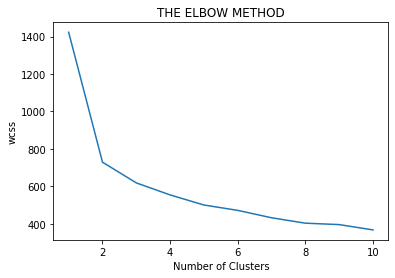

In [117]:
#ploting the results onto a line graph
#Elbow method
plt.plot(range(1,11),wcss)
plt.title('THE ELBOW METHOD')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [118]:
kmeans =KMeans(n_clusters = 2, init = 'k-means++', max_iter=400, n_init = 10,random_state = 0)#200
y_kmeans = kmeans.fit_predict(X)

In [ ]:
#df["cluster"] = y_kmeans

In [126]:
kmeans.cluster_centers_

array([[ 1.00000000e+00,  1.94289029e-16,  3.93755739e-01,
         8.26446281e-01,  4.52708907e-01,  6.52502369e-02,
         2.55057527e-01,  5.84049449e-01,  9.92955384e-02,
         5.41562814e-02,  1.50137741e-01,  6.10622664e-16,
        -4.44089210e-16, -5.55111512e-16, -2.22044605e-16,
        -1.11022302e-16, -8.32667268e-16, -1.11022302e-15,
        -2.77555756e-16, -1.66533454e-15,  3.14049587e-01],
       [ 2.21749409e-01,  1.27344366e-01,  2.89361702e-01,
         9.62174941e-01,  3.77987917e-01,  5.30925460e-02,
         3.07834793e-01,  5.75871513e-01,  1.13579859e-01,
         1.13193741e-01,  2.41134752e-01,  5.65011820e-01,
         5.72104019e-01,  5.54373522e-01,  5.69739953e-01,
         4.96453901e-01,  5.81560284e-01,  6.40661939e-01,
         5.36643026e-01,  5.56737589e-01,  2.32269504e-01]])

In [127]:
# Create data arrays
cluster_centers = kmeans.cluster_centers_
data = np.expm1(cluster_centers)
points = np.append(data, cluster_centers, axis=1)
points

array([[ 1.71828183e+00,  1.94289029e-16,  4.82538378e-01,
         1.28518339e+00,  5.72566357e-01,  6.74261004e-02,
         2.90535860e-01,  7.93285566e-01,  1.04392642e-01,
         5.56495677e-02,  1.61994286e-01,  6.10622664e-16,
        -4.44089210e-16, -5.55111512e-16, -2.22044605e-16,
        -1.11022302e-16, -8.32667268e-16, -1.11022302e-15,
        -2.77555756e-16, -1.66533454e-15,  3.68957617e-01,
         1.00000000e+00,  1.94289029e-16,  3.93755739e-01,
         8.26446281e-01,  4.52708907e-01,  6.52502369e-02,
         2.55057527e-01,  5.84049449e-01,  9.92955384e-02,
         5.41562814e-02,  1.50137741e-01,  6.10622664e-16,
        -4.44089210e-16, -5.55111512e-16, -2.22044605e-16,
        -1.11022302e-16, -8.32667268e-16, -1.11022302e-15,
        -2.77555756e-16, -1.66533454e-15,  3.14049587e-01],
       [ 2.48258536e-01,  1.35808084e-01,  3.35574721e-01,
         1.61738294e+00,  4.59345309e-01,  5.45272329e-02,
         3.60476211e-01,  7.78679994e-01,  1.20281350e-

In [130]:
# Add "clusters" to customers data
points = np.append(points, [[0], [1]], axis=1)
df["clusters"] = kmeans.labels_

In [131]:
# visualize clusters
figure = px.scatter_3d(df,
                    color='clusters',
                    x="Purchases",
                    y="Satisfaction",
                    z="Incidence rate",            
                    category_orders = {"clusters": ["0", "1"]}                    
                    )
figure.update_layout()
figure.show()

In [137]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X, kmeans.labels_, metric='euclidean'))

0.4333482831858844


In [160]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pcomp = pca.fit_transform(X)

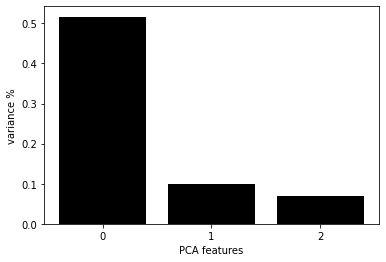

In [161]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(pcomp)

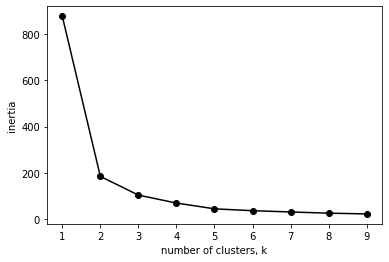

In [162]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:2])
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [166]:
model = KMeans(n_clusters=3)
model_cmp = model.fit(PCA_components.iloc[:,:2])

# silhouette score
print(silhouette_score(PCA_components.iloc[:,:2], model.labels_, metric='euclidean')) 

0.6823386850978193


In [167]:
model = KMeans(n_clusters=2)

clusters = model.fit_predict(PCA_components.iloc[:,:2])

In [179]:
pca_df= pd.DataFrame(data=pcomp,columns=["pca1","pca2"])

In [181]:
pca_df = PCA_components.iloc[:,:2]

In [183]:
pca_df = pd.concat([pca_df,pd.DataFrame({"cluster":clusters})],axis=1)

In [184]:
pca_df["cluster"].value_counts()

1    423
0    363
Name: cluster, dtype: int64

In [185]:
print(silhouette_score(PCA_components.iloc[:,:2] , model.labels_, metric='euclidean'))

0.7160418018416954


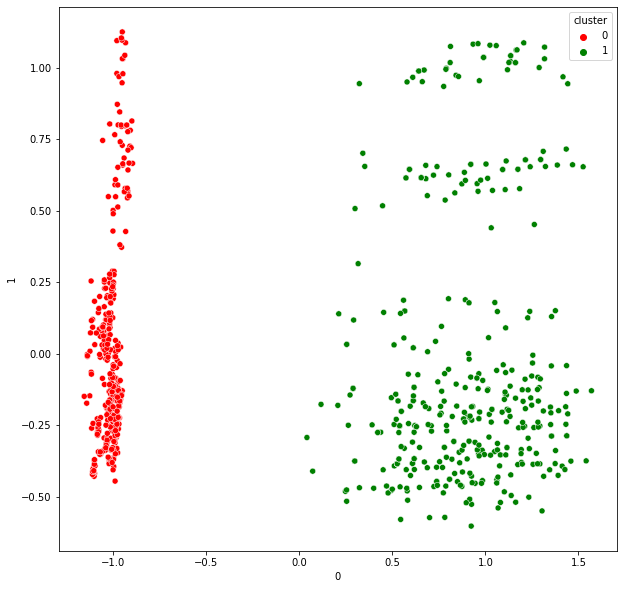

In [189]:
import seaborn as sns
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x=0,y=1,hue="cluster",data=pca_df,palette=["red","green"])

In [191]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pcomp = pca.fit_transform(X)
pca_df= pd.DataFrame(data=pcomp,columns=["pca1","pca2","pca3"])
pca_df = pd.concat([pca_df,pd.DataFrame({"cluster":y_kmeans})],axis=1)
pca_df["cluster"].value_counts()

1    423
0    363
Name: cluster, dtype: int64

In [192]:
pca_df

,pca1,pca2,pca3,cluster
0,1.376896,-0.337660,0.059981,1
1,1.049342,-0.341354,0.232474,1
2,1.214954,-0.191378,0.600088,1
3,0.548635,-0.200602,-0.142029,1
4,0.548635,-0.200602,-0.142029,1
...,...,...,...,...
781,-1.018970,-0.107156,0.078945,0
782,-0.975984,-0.151157,-0.174459,0
783,-0.913856,0.666458,-0.352600,0
784,-1.017807,0.278683,0.176897,0


In [193]:
df_3d = pd.DataFrame()
df_3d['x'] = pca_df["pca1"]
df_3d['y'] = pca_df["pca2"]
df_3d['z'] = pca_df["pca3"]
df_3d['cluster'] = pca_df["cluster"]
#df_3d['t'] = pca_df["pca4"]
import plotly.express as px
df_3d["cluster"] = df_3d["cluster"].astype(str)
fig = px.scatter_3d(df_3d, x='x', y='y', z='z',
              color='cluster', width=900, height=900  )
fig.show()

In [228]:
pred = model.predict(PCA_components.iloc[:,:2])
frame = pd.DataFrame(df_1)
frame['cluster'] = pred
frame.head()

,Complaint Type,Qty,Region,Category,Rank,Incidence rate,R rate,Satisfaction,Experience,Purchases,...,Condition B,Condition C,Condition D,Condition F,Condition G,Condition H,Condition I,Condition J,Satisfaction_Category,cluster
8,0,1.0,19.0,1.0,3.0,3.0,1.50,0.0,0.25,4.0,...,2,2,2,1,1,1,1,2,-1,1
9,4,1.0,19.0,1.0,3.0,3.0,1.50,0.0,0.25,4.0,...,2,2,2,1,1,1,1,2,-1,1
12,0,1.0,4.0,1.0,7.0,2.5,1.86,-100.0,0.57,7.0,...,1,1,2,1,1,2,1,2,3,1
13,0,1.0,4.0,1.0,7.0,2.5,1.86,-100.0,0.57,7.0,...,1,1,1,1,1,1,1,0,3,1
14,0,1.0,4.0,1.0,7.0,2.5,1.86,-100.0,0.57,7.0,...,1,1,1,1,1,1,1,0,3,1


In [229]:
frame['cluster'].value_counts()

1    423
0    363
Name: cluster, dtype: int64

In [227]:
df_1 = df.drop(['DoctorID','clusters'],axis=1)
df_1.head()

,Complaint Type,Qty,Region,Category,Rank,Incidence rate,R rate,Satisfaction,Experience,Purchases,...,Condition A,Condition B,Condition C,Condition D,Condition F,Condition G,Condition H,Condition I,Condition J,Satisfaction_Category
8,0,1.0,19.0,1.0,3.0,3.0,1.50,0.0,0.25,4.0,...,1,2,2,2,1,1,1,1,2,-1
9,4,1.0,19.0,1.0,3.0,3.0,1.50,0.0,0.25,4.0,...,1,2,2,2,1,1,1,1,2,-1
12,0,1.0,4.0,1.0,7.0,2.5,1.86,-100.0,0.57,7.0,...,1,1,1,2,1,1,2,1,2,3
13,0,1.0,4.0,1.0,7.0,2.5,1.86,-100.0,0.57,7.0,...,1,1,1,1,1,1,1,1,0,3
14,0,1.0,4.0,1.0,7.0,2.5,1.86,-100.0,0.57,7.0,...,1,1,1,1,1,1,1,1,0,3


In [231]:
avg_df = frame.groupby(['cluster'], as_index=False).mean()
avg_df.head()

,cluster,Complaint Type,Qty,Region,Category,Rank,Incidence rate,R rate,Satisfaction,Experience,...,Condition A,Condition B,Condition C,Condition D,Condition F,Condition G,Condition H,Condition I,Condition J,Satisfaction_Category
0,0,5.000000,0.000000,17.719008,0.826446,3.074380,5.113499,1.083994,16.809890,0.538182,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.256198
1,1,1.108747,1.910165,13.021277,0.962175,2.401891,4.542695,1.308298,15.174303,0.615603,...,1.130024,1.144208,1.108747,1.13948,0.992908,1.163121,1.281324,1.073286,1.113475,-0.070922


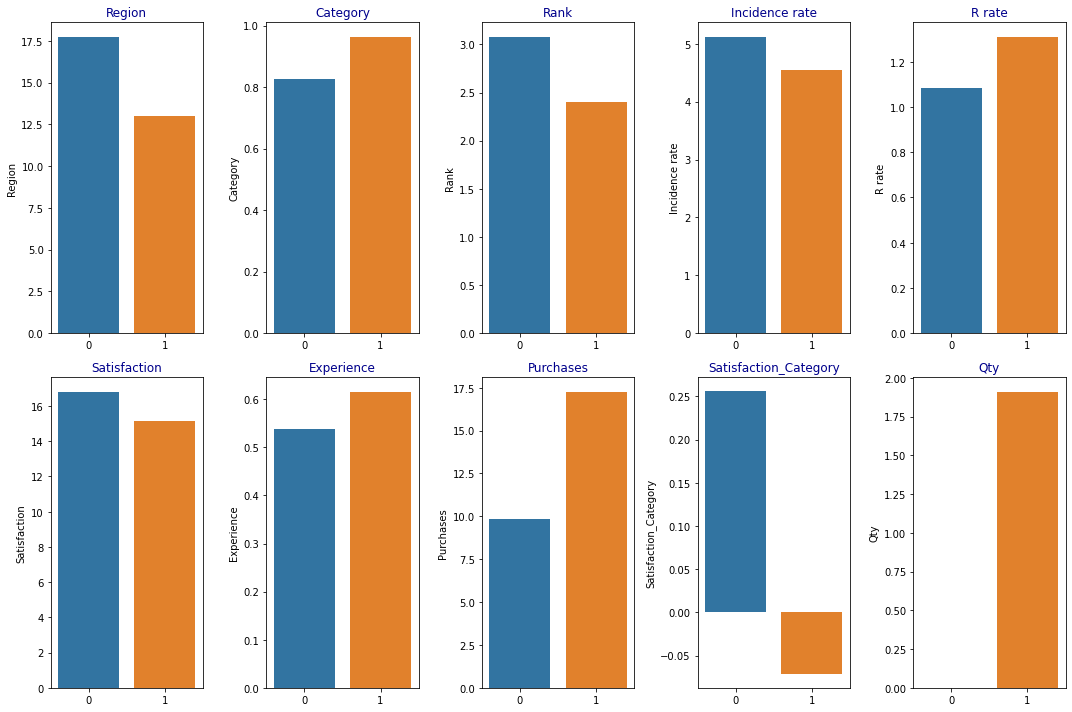

In [233]:
features=["Region","Category","Rank","Incidence rate","R rate","Satisfaction","Experience","Purchases","Satisfaction_Category","Qty"]
plt.figure(figsize=(15,10))
for i,j in enumerate(features):
    plt.subplot(2,5,i+1)
    sns.barplot(avg_df.index,avg_df[j])
    plt.title(j,fontdict={'color':'darkblue'})
plt.tight_layout()
plt.show()

İki sınıfa ait müşterilerin özelliklerine göre sınıflandığı yerleri bulabiliriz.

In [253]:
df2 = pd.DataFrame(frame.groupby(['cluster','Satisfaction_Category'])['Satisfaction_Category'].count())
df2

Satisfaction_Category
cluster Satisfaction_Category                       
0       -1                                       182
         0                                        45
         1                                        21
         2                                        91
         3                                        24
1       -1                                       239
         0                                        69
         1                                        31
         2                                        74
         3                                        10

Birinci tip ve ikinci tip müşteriye ait Satisfaction_Category'lerine göre bazı aralıklarda sınıflandırma yapabiliriz.

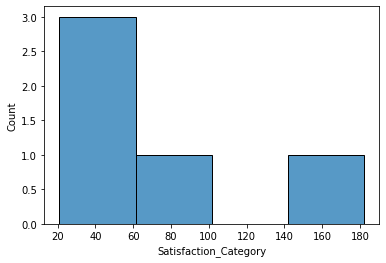

In [254]:
sns.histplot(df2, x=df2['Satisfaction_Category'][0])

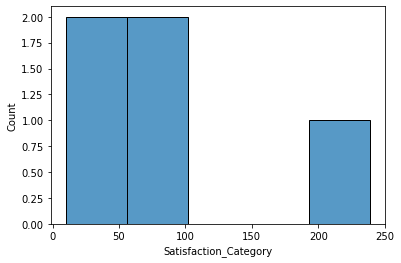

In [255]:
sns.histplot(df2, x=df2['Satisfaction_Category'][1])

In [247]:
df2 = pd.DataFrame(frame.groupby(['cluster','Incidence rate'])['Incidence rate'].count())
df2

Incidence rate
cluster Incidence rate                
0       2.05                         1
        2.13                         1
        2.14                         1
        2.20                         1
        2.25                         5
...                                ...
1       10.00                        5
        11.33                        2
        12.00                       12
        13.00                        5
        14.00                        1

[81 rows x 1 columns]

Birinci tip ve ikinci tip müşteriye ait indence rate'lerine göre bazı aralıklarda sınıflandırma yapabiliriz.

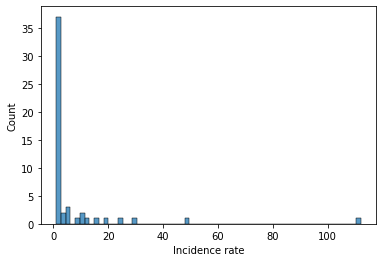

In [250]:
sns.histplot(df2, x=df2['Incidence rate'][0])

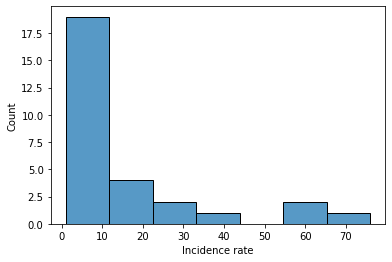

In [251]:
sns.histplot(df2, x=df2['Incidence rate'][1])